# **Preprocesado**

### PASOS PREPROCESAMIENTO PARA MODELADO

1. **Carga de librerías**
2. **Carga del dataset limpio**

3. **Análisis inicial de la variable objetivo**

   3.1. Visualización gráfica de la variable `stroke`

   3.2. Mostrar proporción de clases

4. **Comprobación de datos faltantes**

   4.1. Mostrar nulos explícitos por columna

   4.2. Mostrar total de nulos

5. **Transformación de variables categóricas**
   5.1. Mapear variables categóricas a números (`gender`, `ever_married`, 
   `Residence_type`)

   5.2. Aplicar one-hot encoding a `work_type` y `smoking_status`

   5.3. Verificar valores únicos tras la transformación

6. **Transformación de variables numéricas**
   6.1. Aplicar logaritmo a `avg_glucose_level` para crear `avg_glucose_level_log`

7. **Definición de columnas finales**
   7.1. Seleccionar variables numéricas continuas para estandarizar

   7.2. Seleccionar variables binarias y categóricas codificadas (no estandarizar)

   7.3. Seleccionar variables dummies

8. **Concatenación de variables**

   8.1. Unir todas las variables seleccionadas en una sola matriz de entrada `X`

   8.2. Definir la variable objetivo `y`


9. **División en train y test (80/20)**

   9.1. Separar los datos en conjuntos de entrenamiento y prueba, manteniendo el balance de clases

10. **Estandarización de variables numéricas continuas**

    10.1. Ajustar el scaler solo con train

    10.2. Transformar train y test (solo columnas continuas)


11. **Visualización del desbalance antes de SMOTE**

    11.1. Graficar y mostrar la distribución de clases en el set de entrenamiento

12. **Aplicación de SMOTE solo en el set de entrenamiento**

    12.1. Balancear las clases en el set de entrenamiento

13. **Visualización del desbalance después de SMOTE**

    13.1. Graficar y mostrar la nueva distribución de clases tras SMOTE

14. **(Opcional) Verificación de nulos tras el preprocesamiento**

    14.1. Comprobar nulos en los conjuntos de entrenamiento y prueba

15. **(Opcional) Mostrar la forma de los conjuntos**

    15.1. Mostrar el tamaño de los conjuntos de entrenamiento y prueba
16. **(Opcional) Mostrar la distribución de clases final**

    16.1. Mostrar cantidad de ejemplos por clase en train y test


**Nota:**  
SMOTE solo se aplica al set de entrenamiento, nunca al test, para evitar fuga de información y asegurar una evaluación realista.

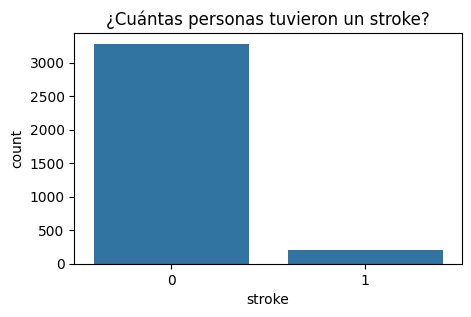

Proporción de personas con y sin stroke:
stroke
0    0.942258
1    0.057742
Name: proportion, dtype: float64

Valores nulos explícitos por columna:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64
Total de valores nulos explícitos: 0
Valores únicos de 'gender': [0 1]


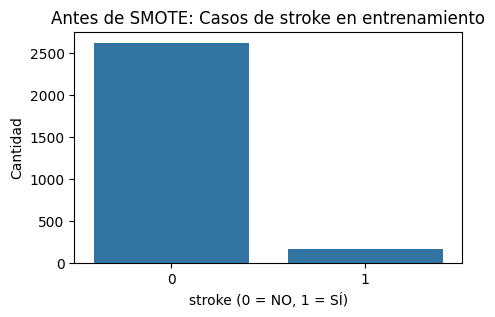

Distribución antes de SMOTE (train):
stroke
0    2623
1     161
Name: count, dtype: int64


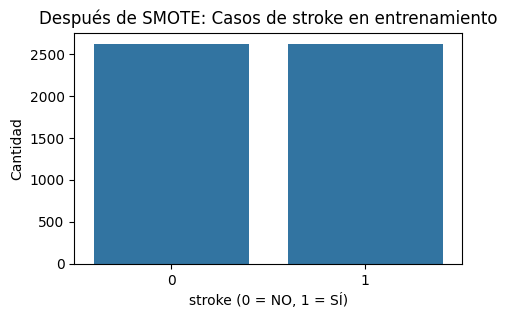

Distribución después de SMOTE (train):
stroke
0    2623
1    2623
Name: count, dtype: int64
Nulos en X_train_bal: 0
Nulos en X_test_std: 0
Tamaño de los conjuntos (shape):
X_train_bal: (5246, 13)
X_test_std:  (697, 13)

Cuadro comparativo de distribución de clases:


,Conjunto,Clase 0,Clase 1,Total,% Clase 0,% Clase 1
0,Train Balanceado,2623,2623,5246,50.00,50.00
1,Test Original,657,40,697,94.26,5.74


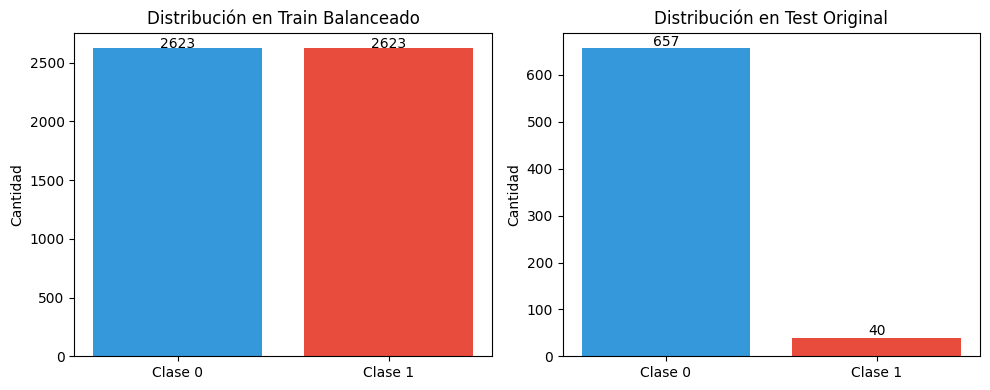

In [ ]:
# ==========================================================
# PREPROCESAMIENTO COMPLETO Y EXPLICADO PARA ENTRENAR MODELOS DE STROKE (80/20) CON SMOTE Y CONCATENACIÓN
# ==========================================================

# PASO 1: Cargar librerías necesarias
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE

# PASO 2: Cargar el dataset 
df = pd.read_csv('../data/raw/stroke_dataset.csv')

# PASO 3: Visualizar y analizar la variable objetivo (stroke)
plt.figure(figsize=(5,3))
sns.countplot(x='stroke', data=df)
plt.title('¿Cuántas personas tuvieron un stroke?')
plt.show()
print('Proporción de personas con y sin stroke:')
print(df['stroke'].value_counts(normalize=True))

# PASO 4: Comprobar si hay datos faltantes (nulos)
print("\nValores nulos explícitos por columna:")
print(df.isnull().sum())
print(f"Total de valores nulos explícitos: {df.isnull().sum().sum()}")

# PASO 5: Transformar variables categóricas a números
# ¿Por qué? Porque los modelos solo entienden números, no palabras.
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1, 'Other': 2})
df['ever_married'] = df['ever_married'].map({'No': 0, 'Yes': 1})
df['Residence_type'] = df['Residence_type'].map({'Urban': 0, 'Rural': 1})
df = pd.get_dummies(df, columns=['work_type', 'smoking_status'], drop_first=True)
print("Valores únicos de 'gender':", df['gender'].unique())

# PASO 6: Aplicar logaritmo a avg_glucose_level para reducir el efecto de valores extremos
df['avg_glucose_level_log'] = np.log1p(df['avg_glucose_level'])

# PASO 7: Definir columnas numéricas y categóricas finales
# Solo variables numéricas continuas para estandarizar (NO incluir binarias)
num_cols = ['age', 'avg_glucose_level_log', 'bmi']
# Variables binarias y categóricas convertidas a números (NO se estandarizan)
bin_cat_cols = ['hypertension', 'heart_disease', 'gender', 'ever_married', 'Residence_type']
cat_cols = [col for col in df.columns if col.startswith('work_type_') or col.startswith('smoking_status_')]

# PASO 8: Concatenar variables numéricas y categóricas
# ¿Qué es concatenar? Es juntar columnas de diferentes tipos (numéricas y categóricas) en una sola tabla.
X = df[num_cols + bin_cat_cols + cat_cols]
y = df['stroke']

# PASO 9: Dividir en train y test (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# PASO 10: Estandarizar SOLO las columnas numéricas continuas usando los datos de train
scaler = StandardScaler()
scaler.fit(X_train[num_cols])
X_train_std = X_train.copy()
X_test_std = X_test.copy()
X_train_std[num_cols] = scaler.transform(X_train[num_cols])
X_test_std[num_cols] = scaler.transform(X_test[num_cols])
# Las columnas binarias y dummies NO se estandarizan

# PASO 11: Visualizar desbalance ANTES de SMOTE (solo en train)
plt.figure(figsize=(5,3))
sns.countplot(x=y_train)
plt.title('Antes de SMOTE: Casos de stroke en entrenamiento')
plt.xlabel('stroke (0 = NO, 1 = SÍ)')
plt.ylabel('Cantidad')
plt.show()
print("Distribución antes de SMOTE (train):")
print(y_train.value_counts())

# PASO 12: Aplicar SMOTE SOLO en el set de entrenamiento
# ¿Por qué? Para balancear las clases y que el modelo aprenda igual de ambas.
smote = SMOTE(random_state=42)
X_train_bal, y_train_bal = smote.fit_resample(X_train_std, y_train)

# PASO 13: Visualizar desbalance DESPUÉS de SMOTE (solo en train)
plt.figure(figsize=(5,3))
sns.countplot(x=y_train_bal)
plt.title('Después de SMOTE: Casos de stroke en entrenamiento')
plt.xlabel('stroke (0 = NO, 1 = SÍ)')
plt.ylabel('Cantidad')
plt.show()
print("Distribución después de SMOTE (train):")
print(pd.Series(y_train_bal).value_counts())

# PASO 14: (Opcional) Verificar nulos después del preprocesamiento
print("Nulos en X_train_bal:", pd.DataFrame(X_train_bal).isnull().sum().sum())
print("Nulos en X_test_std:", X_test_std.isnull().sum().sum())

# PASO 15: (Opcional) Mostrar la forma de los conjuntos
print("Tamaño de los conjuntos (shape):")
print(f"X_train_bal: {X_train_bal.shape}")
print(f"X_test_std:  {X_test_std.shape}")

import pandas as pd
import matplotlib.pyplot as plt

# PASO 16: (Opcional) Mostrar la distribución de clases en cada conjunto

# Crear un DataFrame comparativo
df_comp = pd.DataFrame({
    'Conjunto': ['Train Balanceado', 'Test Original'],
    'Clase 0': [sum(y_train_bal == 0), sum(y_test == 0)],
    'Clase 1': [sum(y_train_bal == 1), sum(y_test == 1)],
    'Total':   [len(y_train_bal), len(y_test)]
})
df_comp['% Clase 0'] = round(df_comp['Clase 0'] / df_comp['Total'] * 100, 2)
df_comp['% Clase 1'] = round(df_comp['Clase 1'] / df_comp['Total'] * 100, 2)

print("\nCuadro comparativo de distribución de clases:")
display(df_comp)

# Gráfico de barras comparativo
fig, ax = plt.subplots(1, 2, figsize=(10,4))

# Train balanceado
ax[0].bar(['Clase 0', 'Clase 1'], [sum(y_train_bal == 0), sum(y_train_bal == 1)], color=['#3498db', '#e74c3c'])
ax[0].set_title('Distribución en Train Balanceado')
ax[0].set_ylabel('Cantidad')
for i, v in enumerate([sum(y_train_bal == 0), sum(y_train_bal == 1)]):
    ax[0].text(i, v + 5, str(v), ha='center')

# Test original
ax[1].bar(['Clase 0', 'Clase 1'], [sum(y_test == 0), sum(y_test == 1)], color=['#3498db', '#e74c3c'])
ax[1].set_title('Distribución en Test Original')
ax[1].set_ylabel('Cantidad')
for i, v in enumerate([sum(y_test == 0), sum(y_test == 1)]):
    ax[1].text(i, v + 5, str(v), ha='center')

plt.tight_layout()
plt.show()
# ==========================================================
# ¿Qué es la concatenación y para qué sirve aquí?
# ==========================================================
# Concatenar significa "juntar" dos cosas. Aquí, juntamos columnas numéricas y categóricas (ya convertidas a números)
# para tener todos los datos en una sola tabla lista para entrenar el modelo.
# Ejemplo: Si tienes una tabla con edades y otra con género, las unes para que cada persona tenga toda su información en una sola fila.

# ==========================================================
# Ahora puedes usar X_train_bal, X_test_std, y_train_bal, y_test para entrenar y validar tus modelos.
# ==========================================================

# EXPLICACIÓN FÁCIL DE LOS RESULTADOS:
# - X_train_bal shape: muestra cuántas personas y características tienes para entrenar (ya balanceado).
# - X_test_std shape: muestra cuántas personas tienes para probar si tu modelo funciona.
# - Los gráficos muestran cuántos casos hay de cada tipo antes y después de SMOTE, como barras de caramelos: una barra para los que no tuvieron stroke y otra para los que sí.

SMOTE **solo se debe aplicar al set de entrenamiento (train)** y **no a todo el dataset limpio** por una razón fundamental de buenas prácticas en ciencia de datos y machine learning:

---

### **¿Por qué NO aplicar SMOTE a todo el dataset?**

Si aplicas SMOTE a todo el dataset antes de dividir en train y test, estarías generando datos sintéticos (falsos) **usando información del conjunto de test**. Esto provoca lo que se llama **data leakage** (fuga de información):  
- El modelo "ve" datos del test durante el entrenamiento, aunque sean sintéticos.
- El resultado: tu modelo parece funcionar mejor de lo que realmente lo haría en datos nuevos, porque ya tiene información del test.

---

### **¿Por qué SÍ aplicar SMOTE solo al train?**

- Primero divides los datos en train y test (por ejemplo, 80/20).
- Solo el **conjunto de entrenamiento** se balancea con SMOTE.
- El conjunto de test **se deja intacto**, reflejando la realidad y el desbalance original.
- Así, la evaluación de tu modelo es honesta y realista, porque el modelo nunca vio los datos de test ni sus patrones sintéticos.

---

### **Resumen visual**

| Opción                | ¿Hay data leakage? | ¿Evaluación realista? |
|-----------------------|-------------------|----------------------|
| SMOTE a todo el set   | Sí                | No                   |
| SMOTE solo al train   | No                | Sí                   |

---

### **Conclusión**

**Siempre aplica SMOTE (u otro balanceo) solo al set de entrenamiento, nunca al dataset completo.**  
Así aseguras que tu modelo generaliza bien y tus métricas son confiables.

---

**Frase clave:**  
> "El test debe simular datos nuevos y reales, nunca debe ser alterado ni usado para crear datos sintéticos."

# **MODELADO**

# Entrenamiento y Evaluación de Modelos de Machine Learning

Se implementará y comparará el desempeño de los siguientes 7 algoritmos de Machine Learning:
1. Máquina de Vectores de Soporte (SVM)
2. Naive Bayes Gaussiano (GNB)
3. Regresión Logística (LR)
4. Árbol de Decisión (DT)
5. Bosque Aleatorio (RF)
6. LightGBM (LGBM)
7. XGBoost (XGB)

> **Recomendación:**  
> Se recomienda realizar el modelado y evaluación con estos algoritmos para identificar cuál ofrece el mejor desempeño en la predicción de stroke en este conjunto de datos.